In [1]:
using Pkg
Pkg.instantiate()
Pkg.precompile()

Precompiling project...
┌ Info: Precompiling LimberJack [6b86205d-155a-4b14-b82d-b6a149ea78f2]
└ @ Base loading.jl:1260


In [2]:
using Interpolations
using QuadGK
using OrdinaryDiffEq

In [3]:
include("/home/jaimerz/PhD/LimberJack.jl/src/core.jl")

power_spectrum (generic function with 1 method)

In [4]:
cosmoPar = CosmoPar(0.25, 0.05, 0.67, 0.96, 0.81, 2.728/2.7)

CosmoPar{Float64}(0.25, 0.05, 0.67, 0.96, 0.81, 1.0103703703703704)

In [5]:
cosmo = Cosmology(cosmoPar, tk_mode="EisHu")
ks = [0.001, 0.01, 0.1, 1.0, 10.0]

5-element Array{Float64,1}:
  0.001
  0.01
  0.1
  1.0
 10.0

In [6]:
pk_julia = power_spectrum(cosmo, ks, 0.)

5-element Array{Float64,1}:
 13545.274454394612
 66629.8267074519
  9819.534311784584
    93.39680712024818
     0.2880755420306492

In [7]:
pk_ccl = [2.12222992e+04,
         8.83444294e+04,
         1.05452648e+04,
         8.22064850e+01,
         2.41173851e-01]

5-element Array{Float64,1}:
 21222.2992
 88344.4294
 10545.2648
    82.206485
     0.241173851

In [8]:
pk_julia./pk_ccl

5-element Array{Float64,1}:
 0.63825669060375
 0.7542051848653618
 0.9311794912712466
 1.1361245663313324
 1.1944725385284378

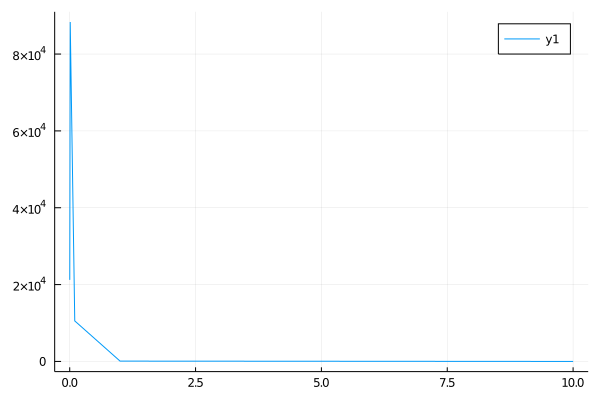

In [10]:
using Plots
plot(ks, pk_julia)
plot(ks, pk_ccl)